### Visualizations for tasks

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [40]:
base_dir = "/Users/madsandersen/Desktop/bi-challenge/CABIChallenge/VisualizationCSVs"

### Question 1

In [64]:
file_name = "Question1_sub1_Vizual.csv"
df = pd.read_csv(f"{base_dir}/{file_name}")

In [ ]:
df['time_to_close'] = pd.to_timedelta(df['time_to_close'])/pd.Timedelta(days=1)

In [42]:
df.head()

,case_id,time_to_close
0,1002,4.598555
1,1006,14.453327
2,1008,63.420537
3,1012,60.888494
4,1016,70.400972


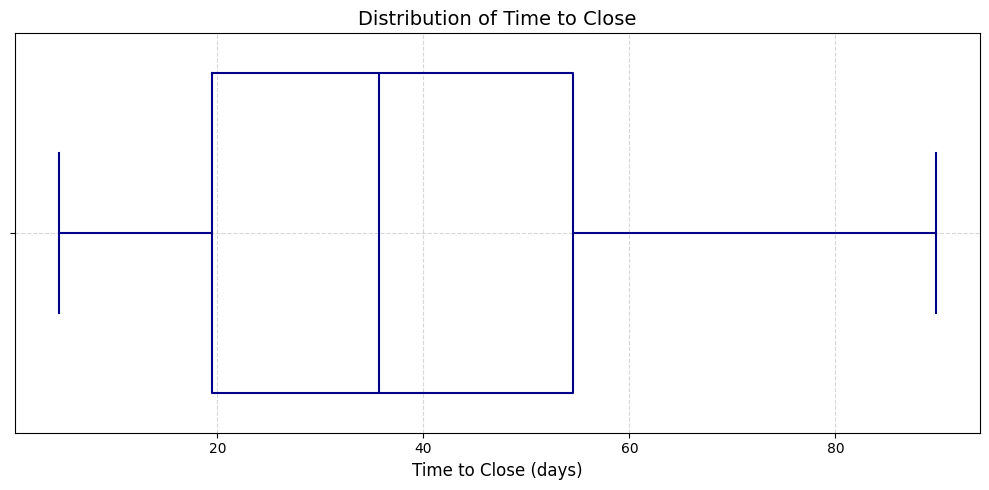

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(
    x='time_to_close',
    data=df,
    color='darkblue',
    ax=ax,
    orient='h',
    fill = False
)

# Add labels and title
ax.set_xlabel("Time to Close (days)", fontsize=12)
ax.set_title("Distribution of Time to Close", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("Figures/CloseTimeDist.png") 
plt.show()


### Sub Question 2

In [35]:
file_name = "Question1_sub2_vizual.csv"
df = pd.read_csv(f"{base_dir}/{file_name}")

In [36]:
df.head()

,market,max
0,Belgium,4200
1,France,3400
2,Germany,2900
3,Italy,2600
4,Netherlands,3600


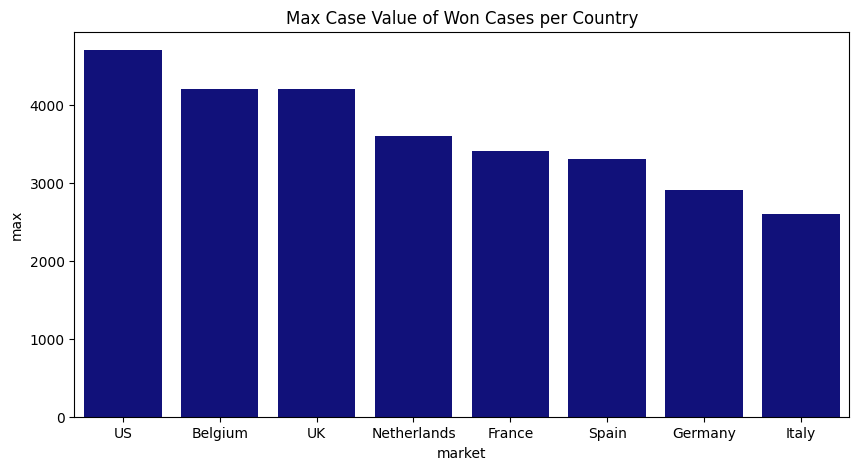

In [37]:
fig, ax = plt.subplots(1,figsize = (10,5))

df = df.sort_values(by = 'max', ascending = False)
sns.barplot(df, 
            x = 'market',
            y = 'max',
            color = 'darkblue'
           )

plt.title("Max Case Value of Won Cases per Country")
plt.savefig("MaxCaseVal.png")

### Question 4

In [69]:
file_name = "Question4_Vizual.csv"
df = pd.read_csv(f"{base_dir}/{file_name}")

In [70]:
df.head()

,assigned_to,month_year,won_cases,lost_cases,total_cases,win_frequency,avg_resolve_time
0,user_1,01-2024,4,2,10,0.40,45 days 23:29:09.16925
1,user_1,02-2024,3,1,5,0.60,57 days 19:15:06.698532
2,user_1,03-2024,3,1,6,0.50,28 days 31:17:46.052087
3,user_2,01-2024,4,2,6,0.67,39 days 32:47:56.734037
4,user_2,02-2024,3,3,9,0.33,31 days 22:46:39.098072


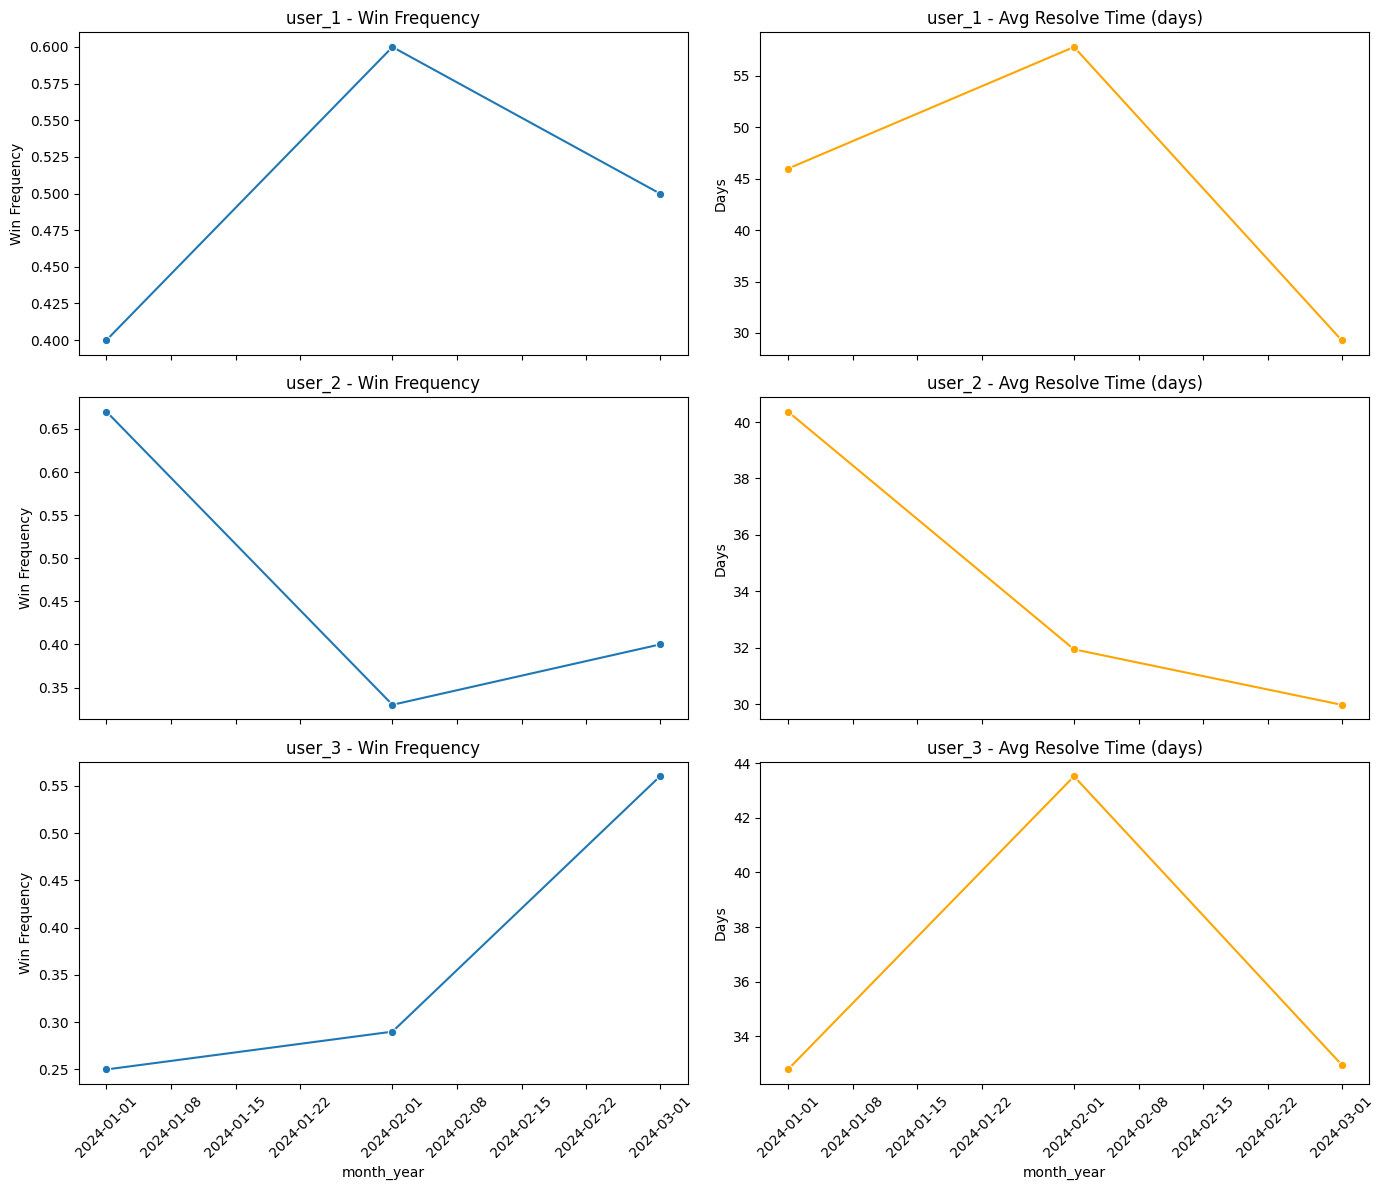

In [71]:
# Convert columns
df['month_year'] = pd.to_datetime(df['month_year'], format='%m-%Y')
df['avg_resolve_days'] = pd.to_timedelta(df['avg_resolve_time']) / pd.Timedelta(days=1)

# Set up 2x3 subplot grid (3 rows for users, 2 cols for metrics)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)

# Get unique users
users = df['assigned_to'].unique()

# Loop over users and plot
for i, user in enumerate(users):
    user_df = df[df['assigned_to'] == user].sort_values('month_year')
    
    # Win frequency plot
    sns.lineplot(
        data=user_df, 
        x='month_year', 
        y='win_frequency', 
        marker='o', 
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'{user} - Win Frequency')
    axes[i, 0].set_ylabel('Win Frequency')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Avg resolve time in days plot
    sns.lineplot(
        data=user_df, 
        x='month_year', 
        y='avg_resolve_days', 
        marker='o', 
        color='orange',
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'{user} - Avg Resolve Time (days)')
    axes[i, 1].set_ylabel('Days')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
